# K-Means应用实例

### 下面用一个实例来讲解用KMeans类和MiniBatchKMeans类来聚类。
### 我们观察在不同的k值下Calinski-Harabasz分数

In [3]:
# -*- coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs 

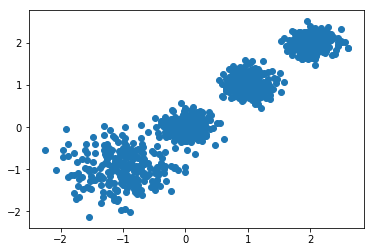

In [7]:
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2, 0.2]
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                  cluster_std=[0.4, 0.2, 0.2, 0.2],
                  random_state=8)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

### 现在我们来用K-Means聚类方法来做聚类，首先选择k=2，代码如下：

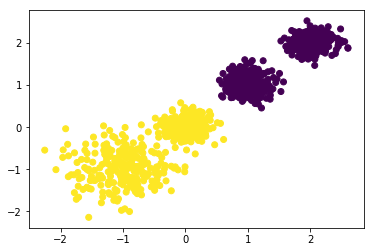

In [11]:
from sklearn.cluster import KMeans
y_pred  = KMeans(n_clusters=2, random_state=8).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

### 现在我们来看看我们用Calinski-Harabasz Index评估的聚类分数:

In [12]:
from sklearn import metrics
metrics.calinski_harabaz_score(X, y_pred)

3080.5250145030973

## 现在k=3来看看聚类效果，代码如下：

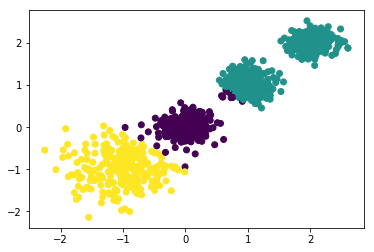

In [13]:
y_pred = KMeans(n_clusters=3, random_state=8).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

### 现在我们来看看k=3时，用Calinski-Harabasz Index评估的聚类分数:

In [14]:
metrics.calinski_harabaz_score(X, y_pred)

2944.0542859217671

### 可见此时k=3的聚类分数比k=2还差。

### 现在我们看看k=4时候的聚类效果：

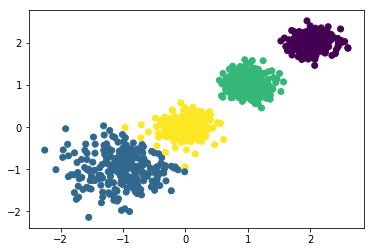

In [15]:
y_pred = KMeans(n_clusters=4, random_state=8).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

###  看下k=4的，Calinski-Harabaz Index评估的聚类分数:

In [19]:
metrics.calinski_harabaz_score(X, y_pred)

5980.7286403301077

### 可见k=4的聚类分数比k=2和k=3都要高，这也符合我们的预期，我们的随机数据集也就是4个簇。当特征维度大于2，我们无法直接可视化聚类效果来肉眼观察时，用Calinski-Harabaz Index评估是一个很实用的方法。

# 现在我们再看看用MiniBatchKMeans的效果，我们将batch size设置为200. 由于我们的4个簇都是凸的，所以其实batch size的值只要不是非常的小，对聚类的效果影响不大。

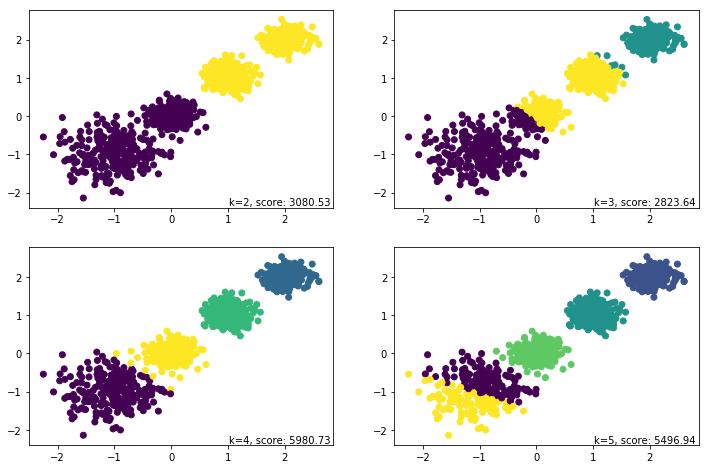

In [27]:
from sklearn.cluster import MiniBatchKMeans
plt.figure(figsize=(12, 8))
for index, k in enumerate((2, 3, 4, 5)):
    plt.subplot(2, 2, index+1)
    y_pred = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=9).fit_predict(X)
    score = metrics.calinski_harabaz_score(X, y_pred)
    plt.scatter(X[:, 0],X[:, 1], c=y_pred)
    plt.text(.99, .01, ('k=%d, score: %.2f' % (k,score)),
             transform=plt.gca().transAxes, size=10,
             horizontalalignment='right')
plt.show()